In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


## Visualising the data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
single_image.shape

(28, 28)

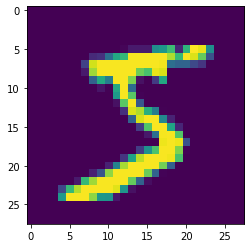

In [13]:
plt.imshow(single_image)

In [14]:
y_train[0]

5

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### these are categorical values, translate them to 'one-hot-encoding' so our cnn could understand. 

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train.shape

(60000,)

In [25]:
y_train = to_categorical(y_train)

In [27]:
y_train.shape

(60000, 10)

In [28]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
y_test.shape

(10000,)

In [30]:
y_test = to_categorical(y_test, num_classes=10)

In [31]:
y_test.shape

(10000, 10)

In [32]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Normalise the x-data

In [33]:
x_train.shape

(60000, 28, 28)

In [35]:
x_train.max()

255

In [36]:
x_train.min()

0

In [37]:
x_train = x_train/255
x_test = x_test/255

In [40]:
x_train.max()
x_train.min()

0.0

In [39]:
x_test.min()

0.0

In [41]:
scaled_single_image = x_train[0]

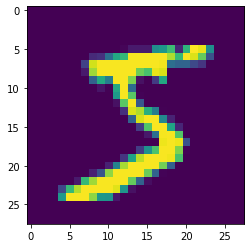

In [42]:
plt.imshow(scaled_single_image)

In [43]:
scaled_single_image.shape

(28, 28)

### Reshape the data - add one more dimension to show 1RGB channel

In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [47]:
x_train.shape

(60000, 28, 28, 1)

In [48]:
x_test.shape

(10000, 28, 28)

In [49]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [50]:
x_test.shape

(10000, 28, 28, 1)

## Training the model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [53]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3 )

## Training

In [57]:
model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 427us/sample - loss: 0.1398 - accuracy: 0.9574 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 2/10
60000/60000 [==============================] - 25s 415us/sample - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0469 - val_accuracy: 0.9849
Epoch 3/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0424 - val_accuracy: 0.9860
Epoch 4/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0393 - val_accuracy: 0.9877
Epoch 5/10
60000/60000 [==============================] - 27s 448us/sample - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 26s 433us/sample - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 7/10
60000/60000 [====================

### Evaluation

In [58]:
model.metrics_names

['loss', 'accuracy']

In [59]:
losses = pd.DataFrame(model.history.history)

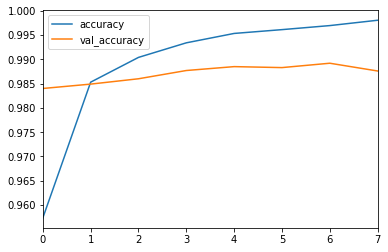

In [61]:
losses[['accuracy','val_accuracy']].plot()

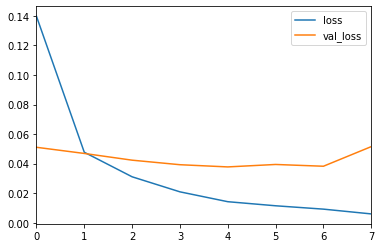

In [62]:
losses[['loss','val_loss']].plot()

In [65]:
import cv2 as cv

In [164]:
image = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\7.jpg', 
                 cv.IMREAD_GRAYSCALE)

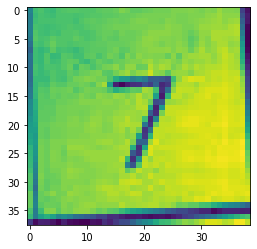

In [165]:
plt.imshow(image)

In [166]:
image.shape

(38, 39)

In [145]:
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [146]:
img_gray.shape

(38, 39)

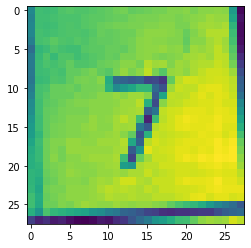

In [168]:
plt.imshow(img_gray.reshape(28, 28))

In [169]:
img_gray.size

784

In [170]:
img_gray = cv.resize(img_gray, (28, 28))

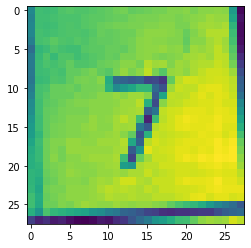

In [171]:
plt.imshow(img_gray)

In [172]:
img_gray = img_gray.reshape(28, 28, 1)

In [173]:
img_gray.shape

(28, 28, 1)

In [174]:
img_gray

array([[[0.61960784],
        [0.70196078],
        [0.69803922],
        [0.70196078],
        [0.71372549],
        [0.71764706],
        [0.71372549],
        [0.71372549],
        [0.71764706],
        [0.72156863],
        [0.7254902 ],
        [0.73333333],
        [0.7372549 ],
        [0.7254902 ],
        [0.72941176],
        [0.73333333],
        [0.7372549 ],
        [0.7372549 ],
        [0.74509804],
        [0.74509804],
        [0.74901961],
        [0.74117647],
        [0.74901961],
        [0.74901961],
        [0.75294118],
        [0.74901961],
        [0.64705882],
        [0.45098039]],

       [[0.61176471],
        [0.70196078],
        [0.70196078],
        [0.70588235],
        [0.70980392],
        [0.70980392],
        [0.70980392],
        [0.71764706],
        [0.72156863],
        [0.72156863],
        [0.7254902 ],
        [0.72941176],
        [0.72941176],
        [0.7372549 ],
        [0.74117647],
        [0.74117647],
        [0.74117647],
        

In [154]:
img_gray = img_gray/ 255

In [176]:
img_gray.max()

0.8156862745098039

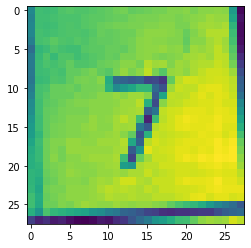

In [177]:
plt.imshow(img_gray.reshape(28, 28))

In [178]:
img_gray.shape

(28, 28, 1)

In [180]:
model.predict_classes(img_gray.reshape(1, 28, 28, 1))

array([1], dtype=int64)

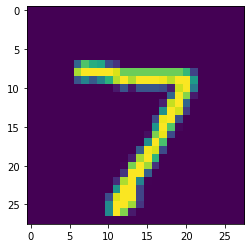

In [163]:
plt.imshow(x_test[0].reshape(28, 28))